In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import cartopy.crs as ccrs

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

In [9]:
k = '/media/rakshith/Seagate Expansion Drive/mraks/CERES.nc'
ceres = xr.open_dataset(k)

ceres.coords['lon'] = (ceres.coords['lon'] + 180) % 360 - 180
ceres = ceres.sortby(ceres.lon)

In [10]:
data1 = ceres.sel(lat=slice(0, 45), lon=slice(-20, 110))

In [11]:
jjas = data1.time.dt.month.isin(range(6, 10))
clim = data1.sel(time=jjas) #ds with only JJAS months

In [12]:
l=[]
for i in data1.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, data1.lat)
mask = globe.is_land(lat_grid, lon_grid)

In [13]:
clim2 = clim.toa_net_all_mon.where(mask>0).mean(dim='time')

In [14]:
lon = clim2.lon
lon2 = np.arange(0, 361, 1)

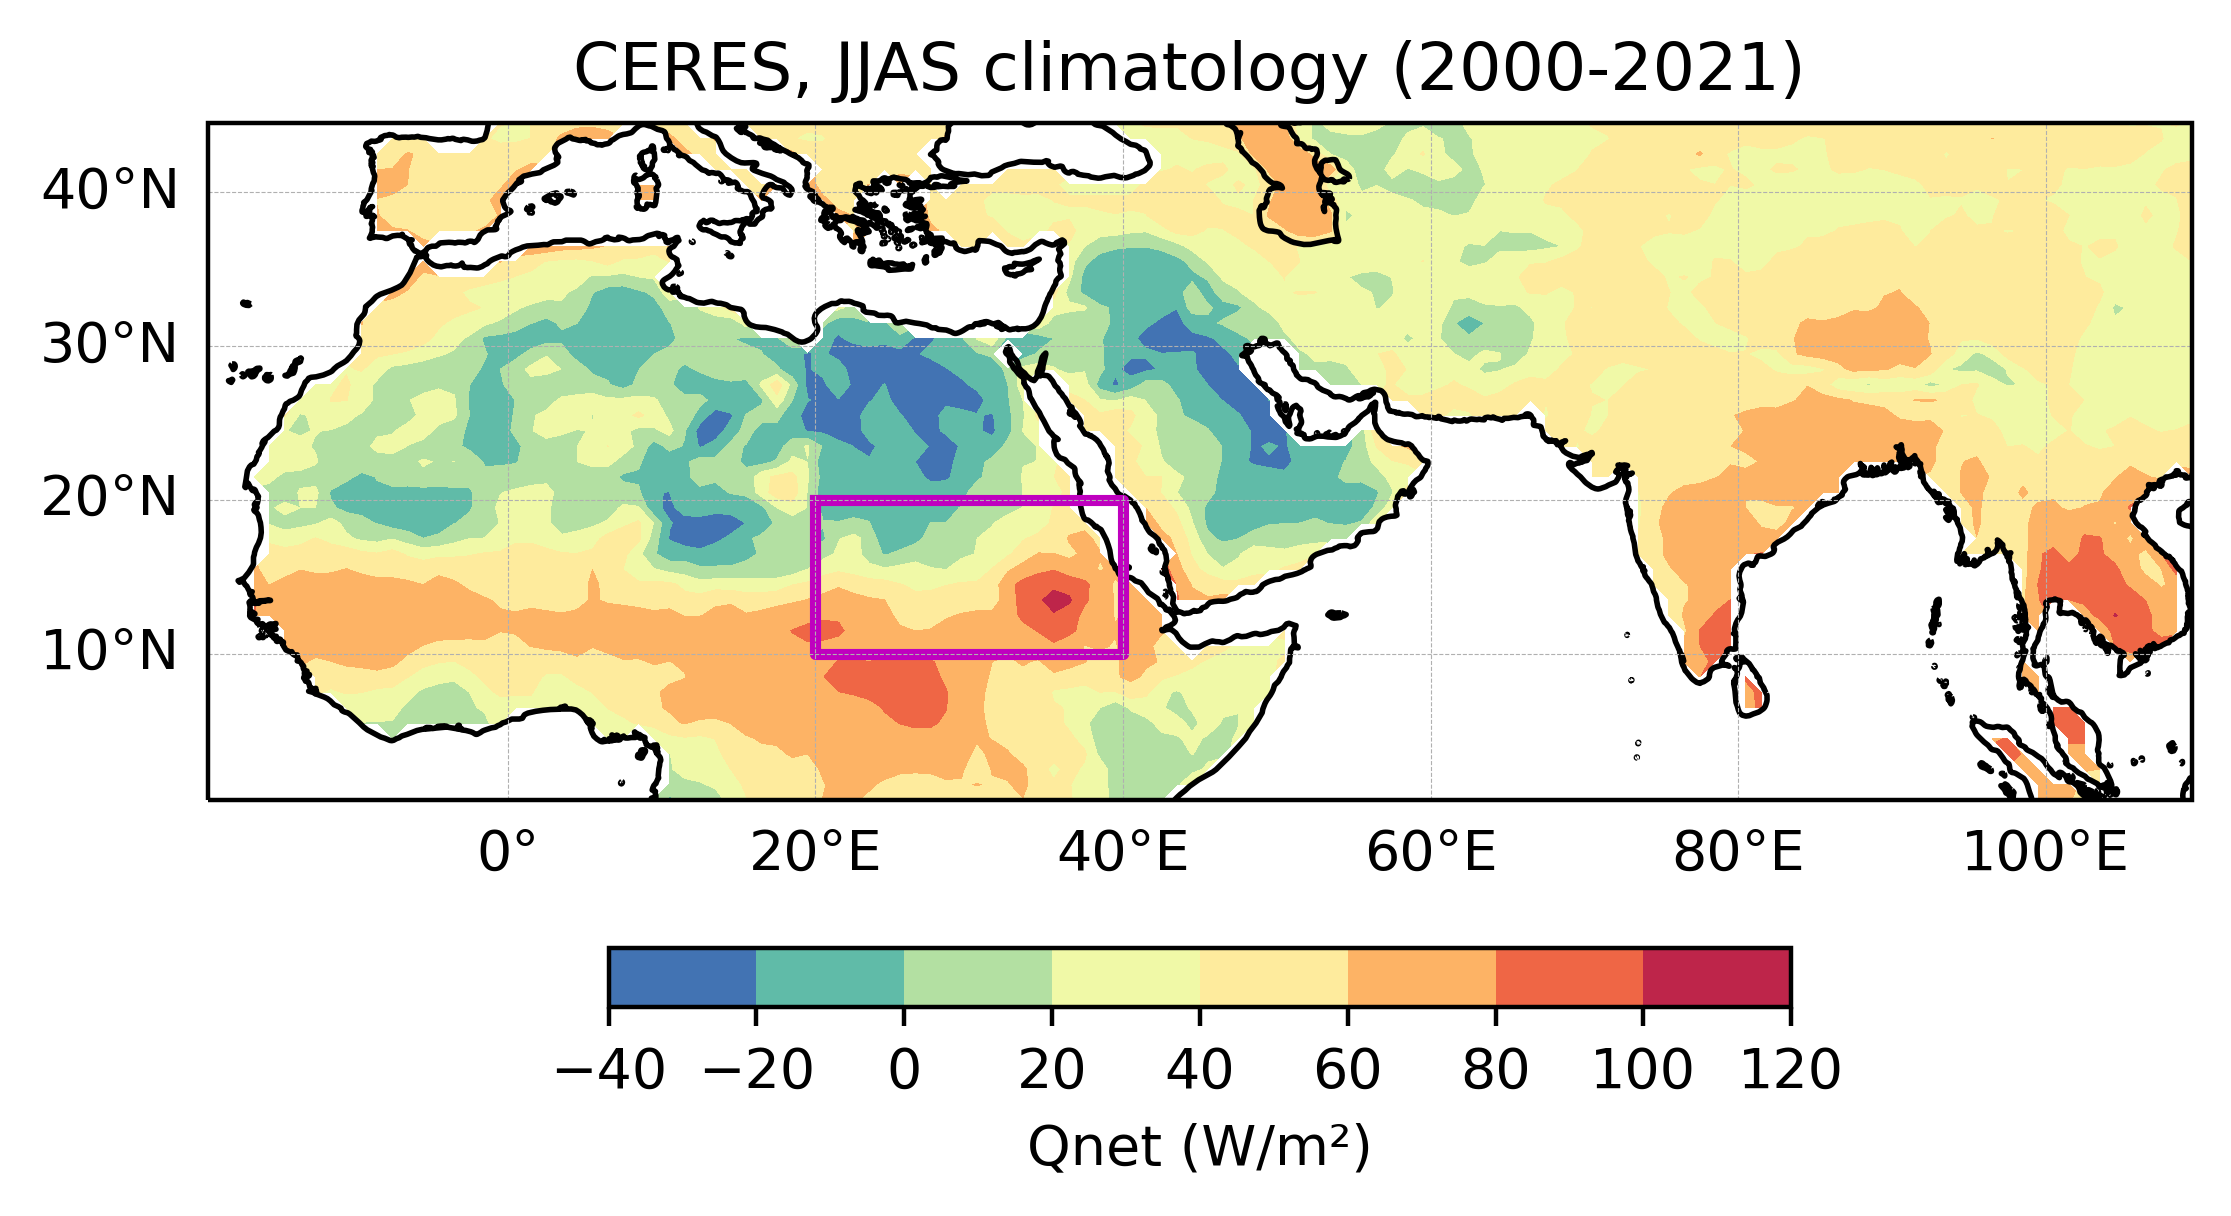

In [15]:
ax = plt.axes(projection = ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.2) #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
#ax.set_extent((-20,100,1,25))
cs = ax.contourf(clim2.lon, clim2.lat, clim2,  cmap='Spectral_r')
ax.plot([20, 20, 40, 40, 20], [20, 10, 10, 20, 20],'m',linewidth=2,transform=ccrs.Geodetic()) #North Africa
plt.colorbar(cs, fraction=0.04, orientation='horizontal', pad=0.1, label='Qnet (W/m\u00b2)')
plt.title('CERES, JJAS climatology (2000-2021) ')
plt.show()

In [3]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/ERA Prec, Pwat all region.nc'
ds = xr.open_dataset(a)

ds.coords['longitude'] = (ds.coords['longitude'] + 180) % 360 - 180
ds = ds.sortby(ds.longitude)

In [111]:
d1 = ds.sel(time=slice('2000', '2021'), latitude=slice(45, 0), longitude=slice(-20, 110))

In [112]:
l=[]
for i in d1.longitude:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, d1.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [113]:
jjas = d1.time.dt.month.isin(range(6, 10)) #JJAS
grid = d1.sel(time=jjas)
grid1 = 86400*grid.mtpr.where(mask>0).mean('time')

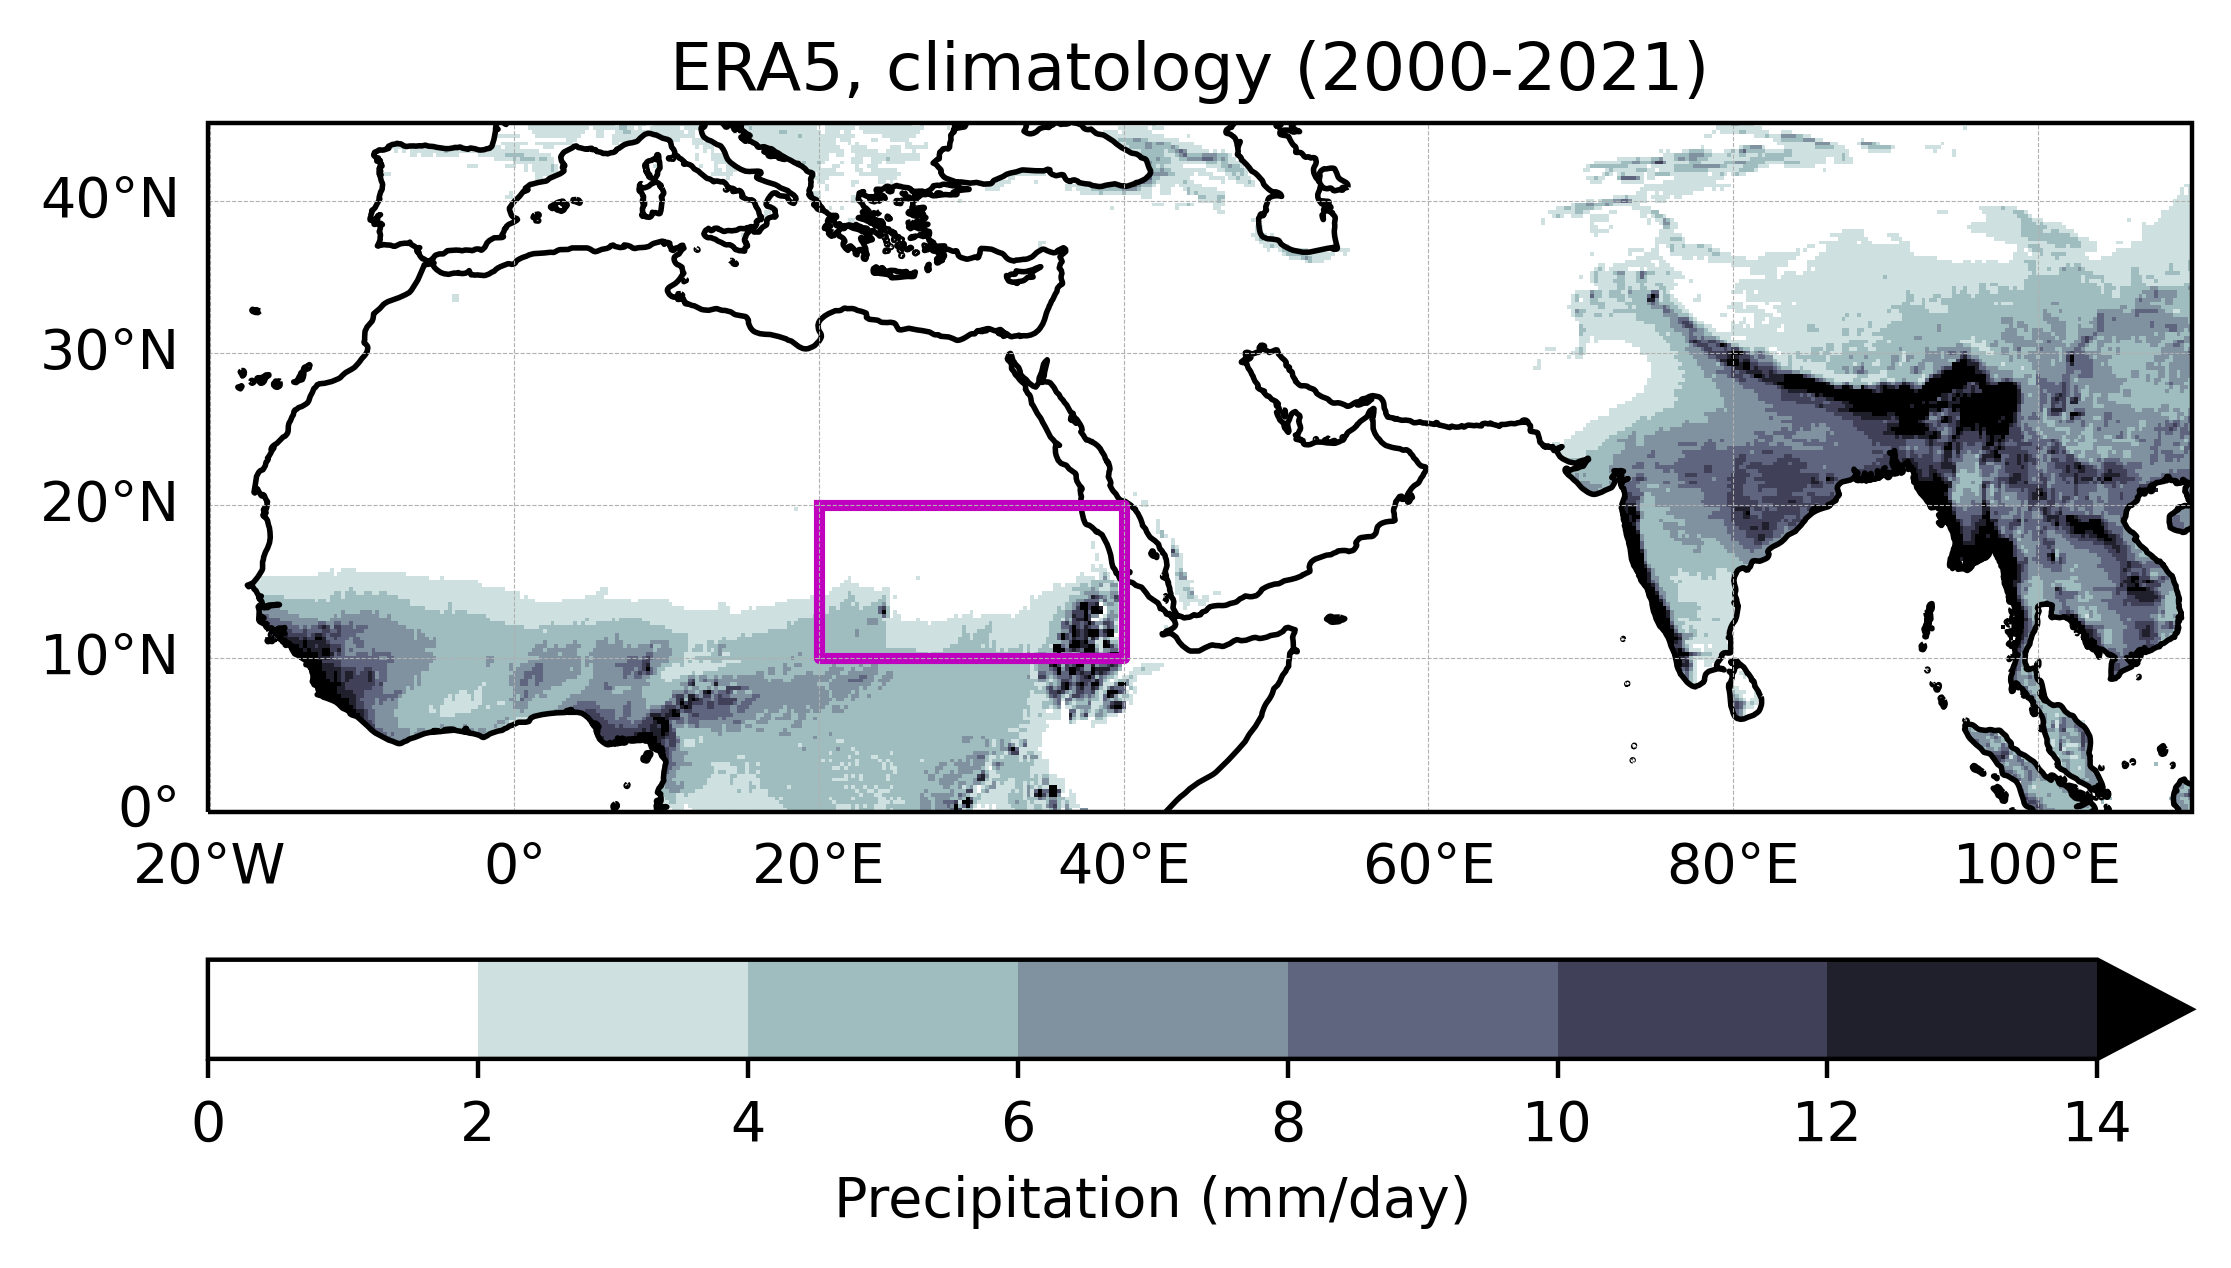

In [131]:
ax = plt.axes(projection = ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.2) #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
#ax.set_extent((-20,100,1,25))
cs = grid1.plot(cmap='bone_r', levels=8, vmin=0, vmax=14, cbar_kwargs={'orientation': 'horizontal', 'pad':0.1, 'label':'Precipitation (mm/day)'})
ax.plot([20, 20, 40, 40, 20], [20, 10, 10, 20, 20],'m',linewidth=2,transform=ccrs.Geodetic()) #North Africa
plt.title('ERA5, climatology (2000-2021) ')
plt.show()

In [16]:
d1 = ds.sel(time=slice('1980', '2000'), latitude=slice(45, -35), longitude=slice(-20, 60))

In [17]:
l=[]
for i in d1.longitude:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, d1.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [18]:
jjas = d1.time.dt.month.isin(range(6, 10)) #JJAS
grid = d1.sel(time=jjas)
grid1 = 86400*grid.mtpr.where(mask>0).mean('time')

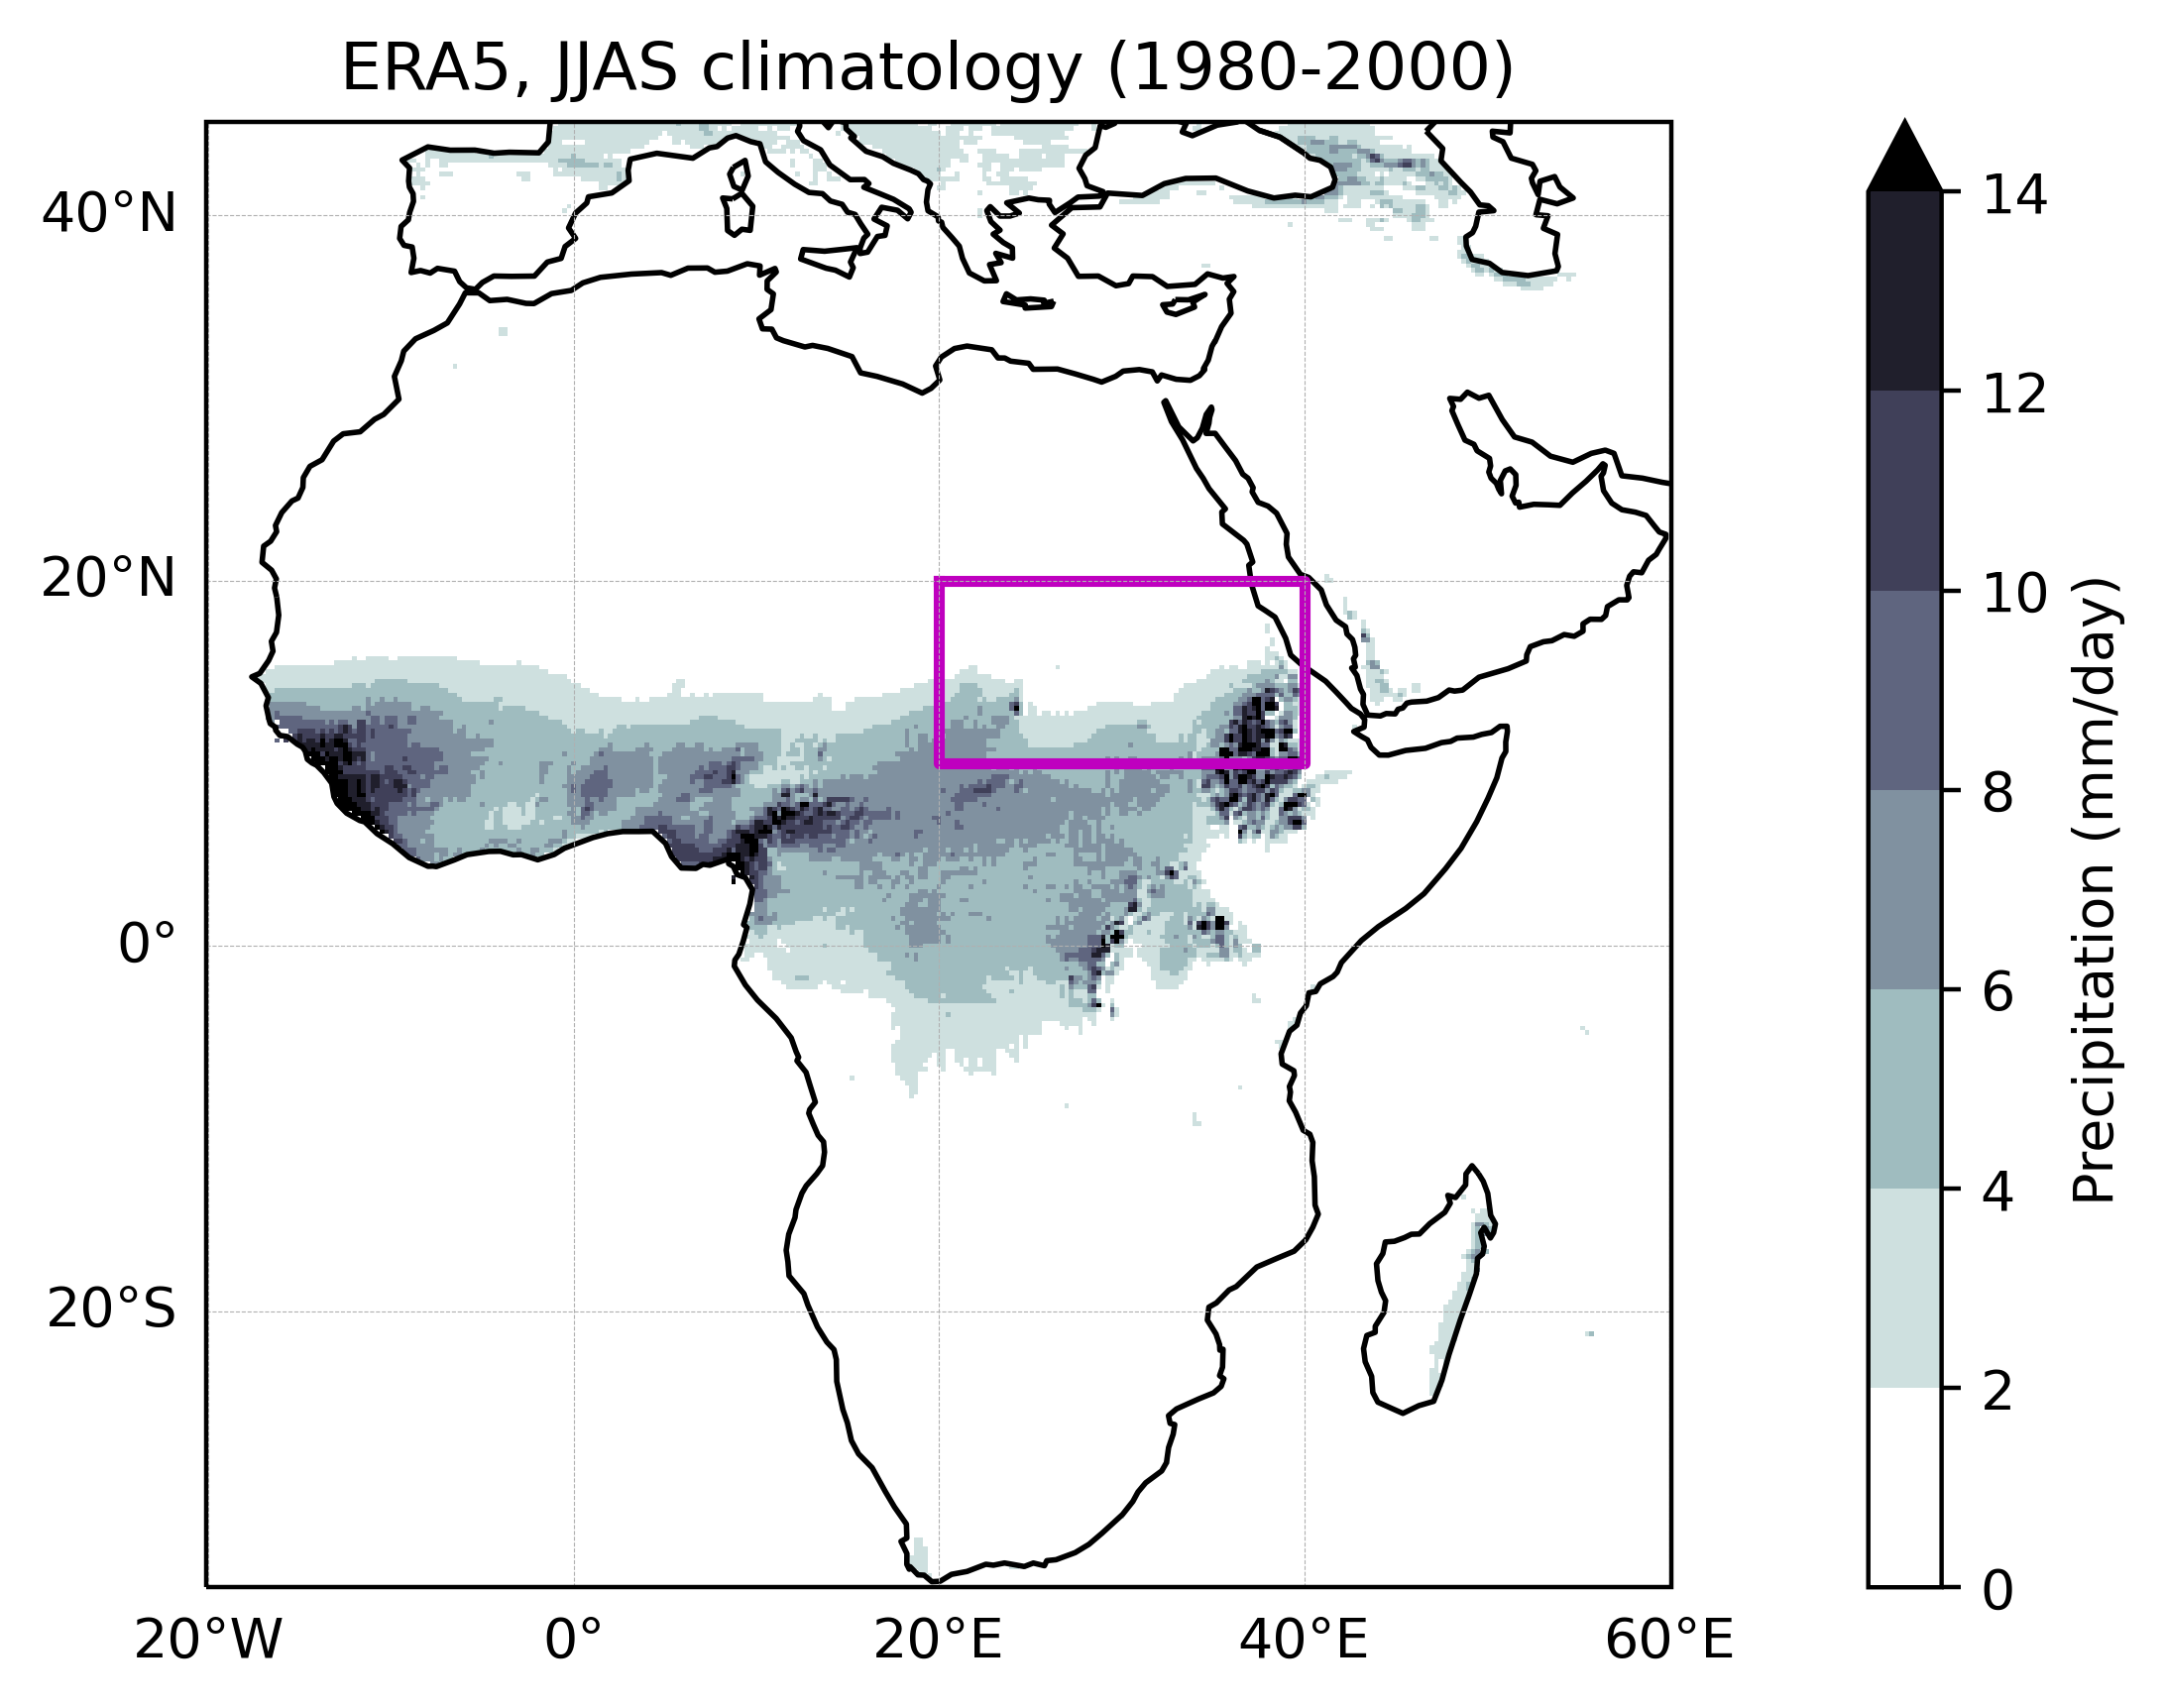

In [19]:
ax = plt.axes(projection = ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.2) #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
#ax.set_extent((-20,100,1,25))
cs = grid1.plot(cmap='bone_r', levels=8, vmin=0, vmax=14, cbar_kwargs={'orientation': 'vertical', 'pad':0.1, 'label':'Precipitation (mm/day)'})
ax.plot([20, 20, 40, 40, 20], [20, 10, 10, 20, 20],'m',linewidth=2,transform=ccrs.Geodetic()) #North Africa
plt.title('ERA5, JJAS climatology (1980-2000) ')
plt.show()

In [14]:
d1 = ds.sel(latitude=slice(45, -35), longitude=slice(-20, 60))
jjas = d1.time.dt.month.isin(range(6, 10)) #JJAS
grid = d1.sel(time=jjas)

In [16]:
grid1 = grid.groupby('time.year').mean('time')

In [17]:
grid2 = 86400*grid1.mtpr.where(mask>0)

In [26]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, axes = plt.subplots(figsize=[11,8])

def animate(i):
    ax = plt.axes(projection = ccrs.PlateCarree())
    gls = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.2) #color='none' makes gridlines invisible
    gls.top_labels=False   # suppress top labels
    gls.right_labels=False # suppress right labels
    ax.coastlines()
    ax.plot([20, 20, 40, 40, 20], [20, 10, 10, 20, 20],'m',linewidth=2,transform=ccrs.Geodetic()) #North Africa
    grid2.isel(year=i).plot(cmap='bone_r', levels=8, vmin=0, vmax=14, cbar_kwargs={'orientation': 'vertical', 'pad':0.1, 'label':'Precipitation (mm/day)'})

ani = animation.FuncAnimation(fig, animate, 24, interval=400, blit=False)
anim = animation.FuncAnimation(plt.gcf(), animate, frames=np.arange(1, 8), 
                               init_func=None, interval=200, blit=False)
HTML(ani.to_jshtml())

/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(

KeyboardInterrupt



Error in callback <function flush_figures at 0x7f41f9beb400> (for post_execute):



KeyboardInterrupt



In [60]:
a = '/media/rakshith/Windows/Users/mraks/TGMS ERA 1959-2021, India only.nc'
ds = xr.open_dataset(a)

In [2]:
a = '/media/rakshith/Windows/Users/mraks/Prec, Pwat ERA.nc'
era = xr.open_dataset(a)

era.coords['longitude'] = (era.coords['longitude']+180) % 360 -180
era = era.sortby(era.longitude)

In [7]:
ds = era.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

In [8]:
d1 = ds.sel(latitude=slice(45, -35), longitude=slice(-20, 60))

In [9]:
lon_grid, lat_grid = np.meshgrid(d1.longitude, d1.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [10]:
jjas = d1.time.dt.month.isin(range(6, 10)) #JJAS
grid = d1.sel(time=jjas)
#grid1 = 86400*grid.mtpr.where(mask>0).mean('time')
grid1 = 86400*grid.mtpr.mean('time')

Text(0.5, 1.0, 'ERA5, JJAS climatology (2000-2020)')

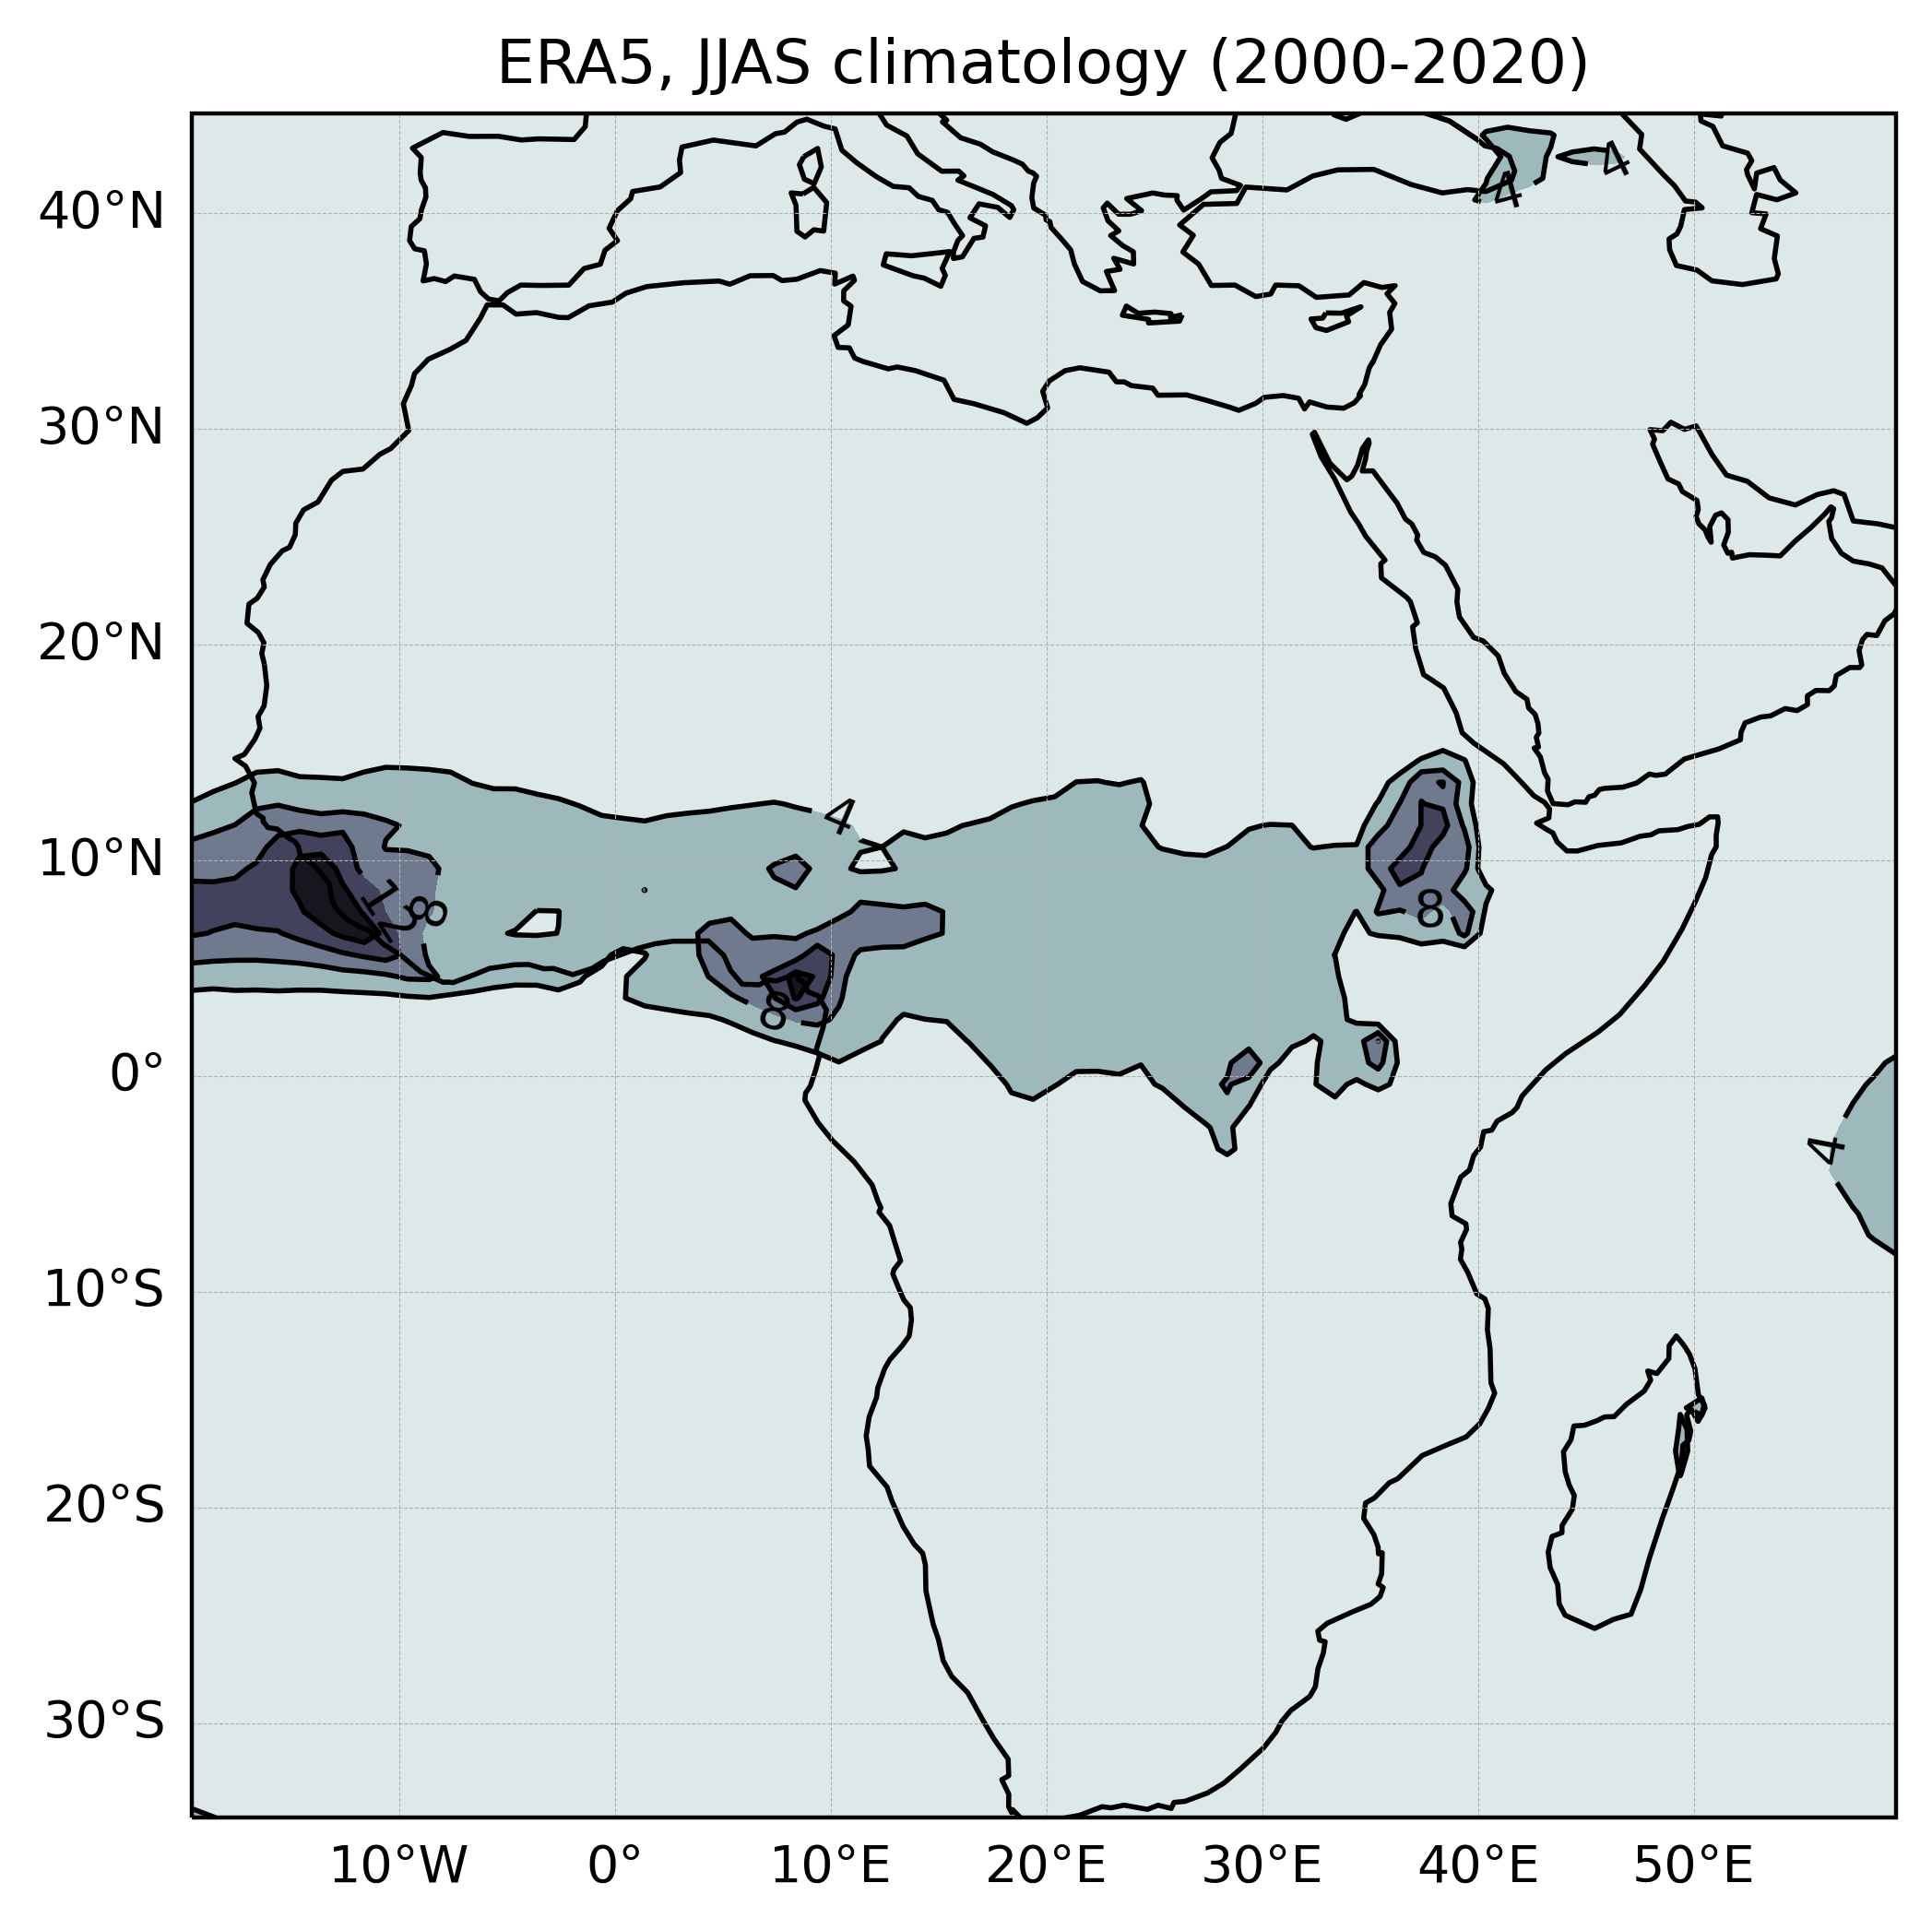

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8,6))
gls = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.2) #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()

num = 5

cs = ax.contourf(grid1.longitude, grid1.latitude, grid1, num, cmap='bone_r')
linec = ax.contour(grid1.longitude, grid1.latitude, grid1, num, linewidths=1, colors=['black'])#, cmap='Spectral_r')
ax.clabel(
        linec,  # Typically best results when labelling line contours.
        colors=['black'],
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
    )
plt.title('ERA5, JJAS climatology (2000-2020)')
#ax2 = fig.add_axes([0.84, 0.2, 0.03, 0.6]) #(padding, bottom, thickness, height)
#cbar = fig.colorbar(cs, orientation='horizontal', label='Rainfall (mm/day)')

<a list of 39 text.Text objects>